In [1]:
import cv2
from operator import itemgetter
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

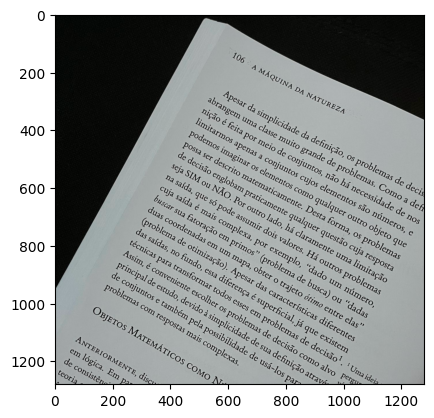

In [2]:
paper = cv2.imread("livro.jpeg")
plt.imshow(paper)

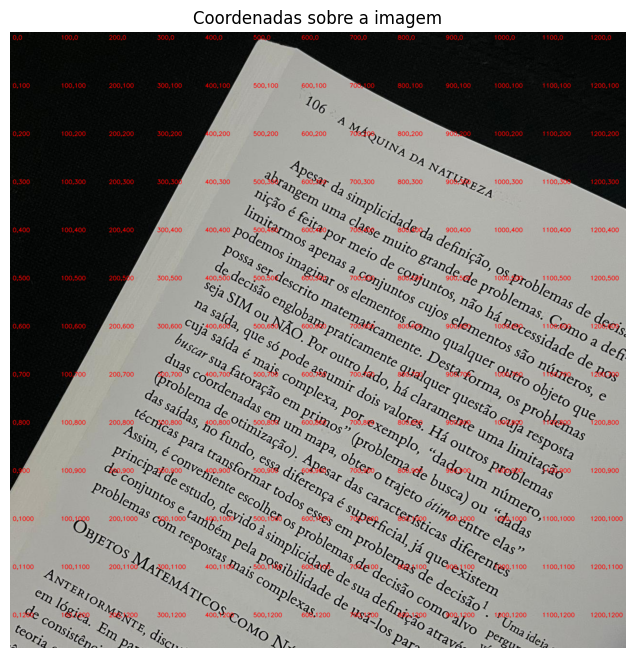

In [ ]:
imagem = cv2.imread("livro.jpeg")
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_com_coords = imagem_rgb.copy()

# Itera sobre a imagem para desenhar as coordenadas
# As coordenadas são desenhadas a cada 100 pixels (tanto na altura quanto na largura)
altura, largura = imagem_com_coords.shape[:2]
for y in range(0, altura, 100):
    for x in range(0, largura, 100):
        texto = f"{x},{y}"
        cv2.putText(
            imagem_com_coords,
            texto,
            (x + 5, y + 15),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.4,
            (255, 0, 0),
            1,
            cv2.LINE_AA,
        )

plt.figure(figsize=(10, 8))
plt.imshow(imagem_com_coords)
plt.title("Coordenadas sobre a imagem")
plt.axis("off")
plt.show()

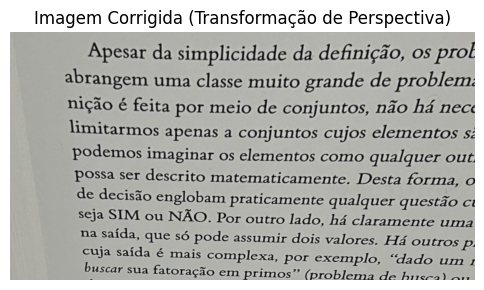

In [ ]:
# Define os pontos de origem na imagem original
# esses pontos foram identificados manualmente na imagem com as coordenadas
# A ordem dos pontos é importante: geralmente, superior esquerdo, superior direito, inferior direito, inferior esquerdo.
pontos_originais = np.float32(
    [
        [500, 200],  # ponto 1, superior esquerdo
        [1100, 500],  # ponto 2, superior direito
        [1000, 1000],  # ponto 3, inferior direito
        [200, 600],  # ponto 4, inferior esquerdo
    ]
)

# tamanho da imagem final
largura, altura = 1500, 800

# Aplica a transformacao de perspectiva na imagem
pontos_destino = np.float32([[0, 0], [largura, 0], [largura, altura], [0, altura]])

# Calcula a matriz de transformação de perspectiva
# Essa matriz é usada para mapear os pontos originais para os pontos de destino,
# corrigindo a distorção de perspectiva.
matriz = cv2.getPerspectiveTransform(pontos_originais, pontos_destino)
imagem_corrigida_bgr = cv2.warpPerspective(imagem, matriz, (largura, altura))
imagem_corrigida_rgb = cv2.cvtColor(imagem_corrigida_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 8))
plt.imshow(imagem_corrigida_rgb)
plt.title("Imagem Corrigida (Transformação de Perspectiva)")
plt.axis("off")
plt.show()